## Primordial parameters

Here we sample with all IGM parameters on sim#3 of the Aus20 suite, after using the 'camb_speedup' which recycles the fiducial power spectrum when changes in the expansion history are not sampled (i.e. only changing the primordial power). We compare posteriors for Gaussian prior with $\sigma=0.15$ in unit volume with a uniform prior

In [1]:
import numpy as np
import emcee_sampler
from chainconsumer import ChainConsumer

 /home/chris/.local/lib/python3.8/site-packages/pandas/compat/__init__.py:117: UserWarning:Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.


In [2]:
sampler_uni = emcee_sampler.EmceeSampler(read_chain_file=45)
sampler_gau = emcee_sampler.EmceeSampler(read_chain_file=46)

 /home/chris/.local/lib/python3.8/site-packages/paramz/parameterized.py:61: RuntimeWarning:Don't forget to initialize by self.initialize_parameter()!


Chain shape is  (912500, 10)
Chain shape is  (402500, 10)


In [3]:
chain_uni,lnprob_uni=sampler_uni.get_chain(cube=False)
chain_gau,lnprob_gau=sampler_gau.get_chain(cube=False)

 <ipython-input-4-a7328a825ed0>:7: UserWarning:Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


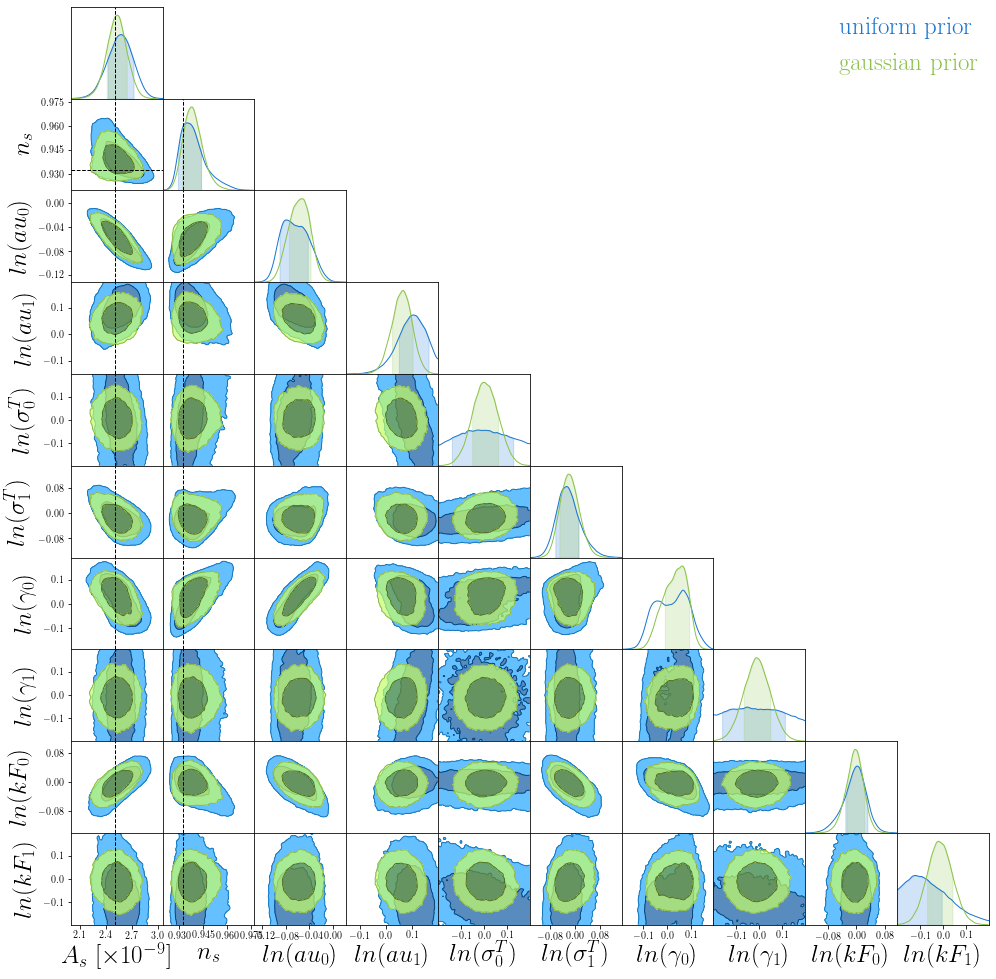

In [4]:
c=ChainConsumer()
c.add_chain(chain_uni,parameters=sampler_uni.paramstrings,name="uniform prior")
c.add_chain(chain_gau,parameters=sampler_gau.paramstrings,name="gaussian prior")
truth={sampler_uni.paramstrings[0]:sampler_uni.truth[0],sampler_uni.paramstrings[1]:sampler_uni.truth[1]}
c.configure(diagonal_tick_labels=False, tick_font_size=10, label_font_size=25, max_ticks=4)
fig = c.plotter.plot(figsize=(15,15),truth=truth)
fig.show()

 <ipython-input-5-267e9f79573c>:7: UserWarning:Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


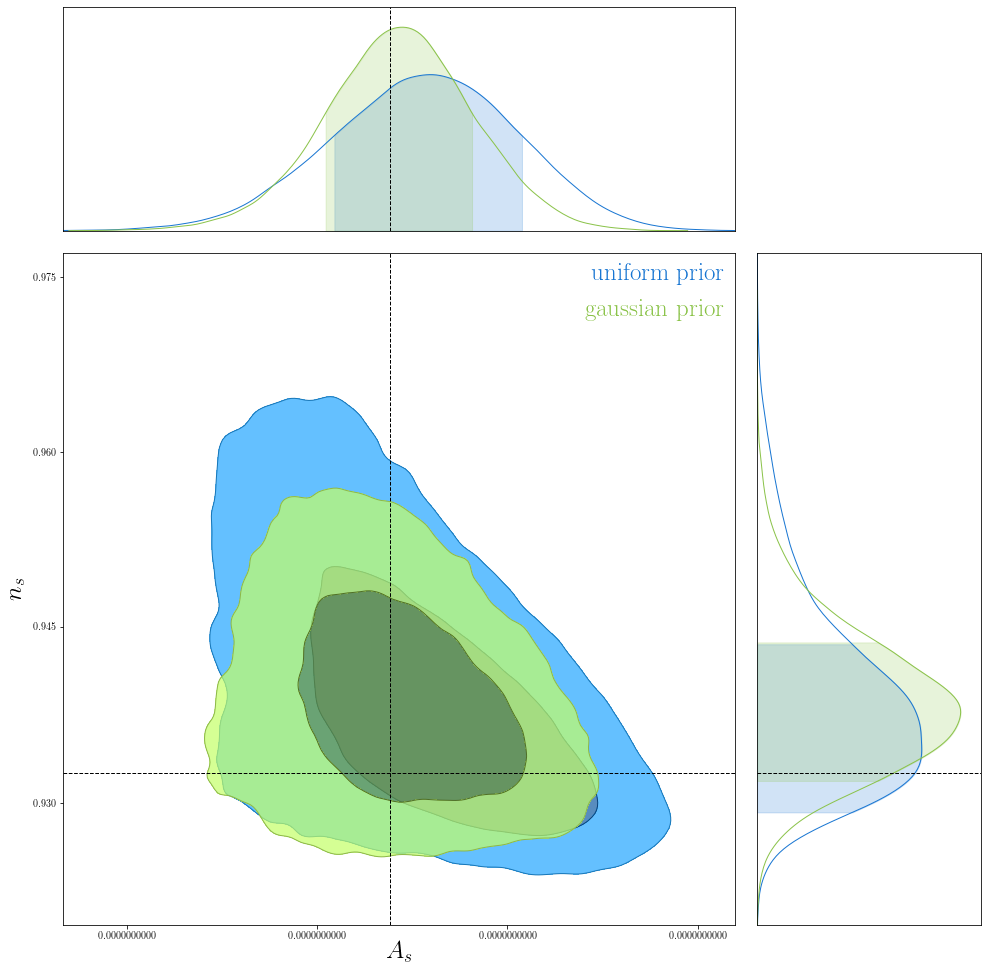

In [5]:
c=ChainConsumer()
c.add_chain(chain_uni,parameters=sampler_uni.paramstrings,name="uniform prior")
c.add_chain(chain_gau,parameters=sampler_gau.paramstrings,name="gaussian prior")
parameters = sampler_uni.paramstrings
c.configure(diagonal_tick_labels=False, tick_font_size=10, label_font_size=25, max_ticks=4)
fig = c.plotter.plot(figsize=(15,15),parameters=parameters[:2],truth=sampler_uni.truth)
fig.show()